In [125]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import itertools
import math

## Removing all special characters from R & J and creating a list of all words
##### In this lab, I did not use any special terminal commands outside of git push, ssh/tmux attatchment commands

In [75]:
with open("romeoandjuliet.txt", "r") as infile:
    raw_data = infile.read()
    
raw_data = raw_data.replace("\n", "")
raw_data = raw_data.replace(",", "")
raw_data = raw_data.replace("\'", "")
raw_data = raw_data.replace(".", "")
raw_data = raw_data.replace("?", "")
raw_data = raw_data.replace("!", "")
raw_data = raw_data.replace("[", "")
raw_data = raw_data.replace("]", "")
raw_data = raw_data.replace("-", " ")
raw_data = raw_data.replace(";", "")
raw_data = raw_data.replace("(", "")
raw_data = raw_data.replace(")", "")
raw_data = raw_data.replace(":", "")
raw_data = raw_data.replace('"',"")
raw_data = list(raw_data.split())

data = []
for word in raw_data:
    data.append(word.lower())
data

['the',
 'tragedy',
 'of',
 'romeo',
 'and',
 'julietby',
 'william',
 'shakespearedramatis',
 'personae',
 'chorus',
 'escalus',
 'prince',
 'of',
 'verona',
 'paris',
 'a',
 'young',
 'count',
 'kinsman',
 'to',
 'the',
 'prince',
 'montague',
 'heads',
 'of',
 'two',
 'houses',
 'at',
 'variance',
 'with',
 'each',
 'other',
 'capulet',
 'heads',
 'of',
 'two',
 'houses',
 'at',
 'variance',
 'with',
 'each',
 'other',
 'an',
 'old',
 'man',
 'of',
 'the',
 'capulet',
 'family',
 'romeo',
 'son',
 'to',
 'montague',
 'tybalt',
 'nephew',
 'to',
 'lady',
 'capulet',
 'mercutio',
 'kinsman',
 'to',
 'the',
 'prince',
 'and',
 'friend',
 'to',
 'romeo',
 'benvolio',
 'nephew',
 'to',
 'montague',
 'and',
 'friend',
 'to',
 'romeo',
 'tybalt',
 'nephew',
 'to',
 'lady',
 'capulet',
 'friar',
 'laurence',
 'franciscan',
 'friar',
 'john',
 'franciscan',
 'balthasar',
 'servant',
 'to',
 'romeo',
 'abram',
 'servant',
 'to',
 'montague',
 'sampson',
 'servant',
 'to',
 'capulet',
 'gregor

## Creating a dictionary of all words and their # of instances in word list

In [73]:
book_length = len(data)
print(book_length)
dictionary = {}
for word in data:
    if word in dictionary:
        dictionary[word] = dictionary[word] + 1
    else:
        dictionary[word] = 1
print(dictionary)

25851
{'the': 680, 'tragedy': 1, 'of': 400, 'romeo': 137, 'and': 719, 'julietby': 1, 'william': 1, 'shakespearedramatis': 1, 'personae': 1, 'chorus': 3, 'escalus': 2, 'prince': 36, 'verona': 13, 'paris': 35, 'a': 463, 'young': 24, 'count': 5, 'kinsman': 13, 'to': 574, 'montague': 31, 'heads': 7, 'two': 26, 'houses': 7, 'at': 70, 'variance': 2, 'with': 255, 'each': 4, 'other': 20, 'capulet': 33, 'an': 85, 'old': 33, 'man': 72, 'family': 1, 'son': 18, 'tybalt': 55, 'nephew': 4, 'lady': 68, 'mercutio': 21, 'friend': 16, 'benvolio': 17, 'friar': 88, 'laurence': 17, 'franciscan': 3, 'john': 10, 'balthasar': 7, 'servant': 7, 'abram': 2, 'sampson': 4, 'gregory': 5, 'peter': 17, 'juliets': 5, 'nurse': 150, 'apothecary': 5, 'three': 11, 'musicians': 9, 'officer': 3, 'wife': 47, 'juliet': 58, 'daughter': 14, 'citizens': 6, 'gentlemen': 11, 'gentlewomen': 2, 'both': 23, 'maskers': 4, 'torchbearers': 1, 'pages': 1, 'guards': 1, 'watchmen': 1, 'servants': 3, 'attendants': 2, 'scene': 8, 'mantua': 1

## Graph of Frequency per Word

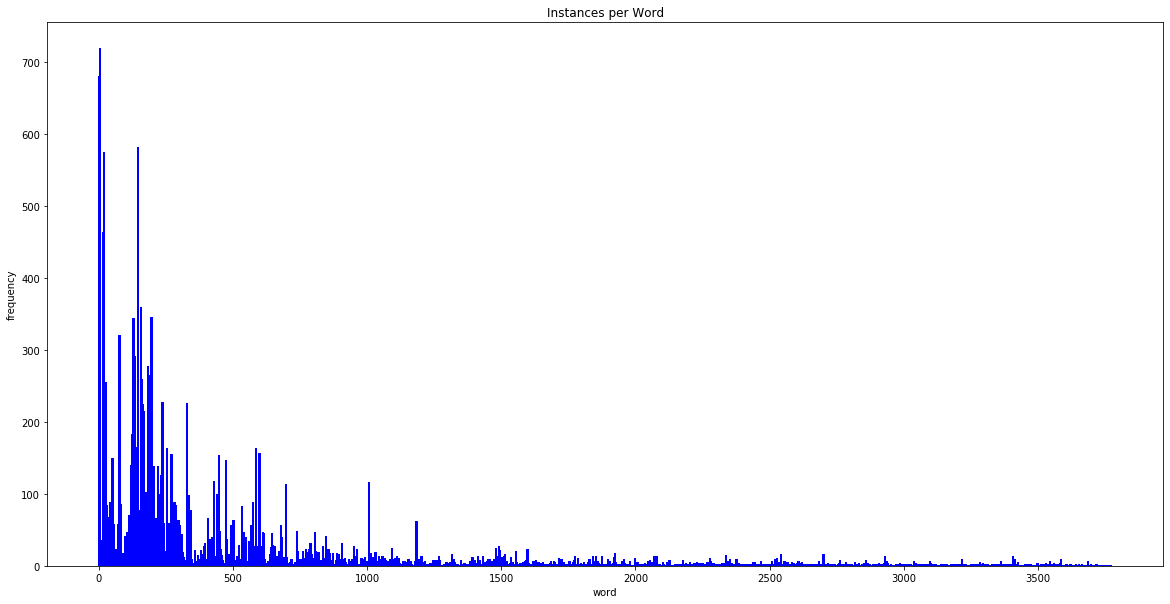

In [101]:
N = len(dictionary)
width = 8
plt.bar(range(N), dictionary.values(), width, color="blue")
plt.title('Instances per Word')
plt.ylabel('frequency')
plt.xlabel('word')

fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

## Ordering the Dictionary based on rank and determining most and least frequent words
#### Code source: https://stackoverflow.com/questions/7971618/python-return-first-n-keyvalue-pairs-from-dict

In [105]:
ordered_dictionary_ranks = OrderedDict(sorted(dictionary.items(), key=lambda x: x[1]))
frequent_ten = list(itertools.islice(ordered_dictionary_ranks.items(), N-10, N))
least_frequent_ten = list(itertools.islice(ordered_dictionary_ranks.items(), 0, 10))

In [106]:
frequent_ten

[('in', 320),
 ('is', 344),
 ('that', 346),
 ('my', 360),
 ('of', 400),
 ('a', 463),
 ('to', 574),
 ('i', 581),
 ('the', 680),
 ('and', 719)]

In [107]:
least_frequent_ten

[('tragedy', 1),
 ('julietby', 1),
 ('william', 1),
 ('shakespearedramatis', 1),
 ('personae', 1),
 ('family', 1),
 ('torchbearers', 1),
 ('pages', 1),
 ('guards', 1),
 ('watchmen', 1)]

#### One thing that word count does not address is placement in the text. For example, the word "blue" with frequency = 5 matters more if only mentioned in the first scene of the first act. The least frequent ten words has little to no meaning because there are many more than ten words in the dictionary with only one instance in romeo and juliet. The most frequent ten words has structural meaning because it indictates the way the english language itself is composed, in contrast to rare/odd singly used vocabulary words. 

## Sorting Dictionary in descending order and plotting word count vs. rank

In [111]:
descending_dictionary = OrderedDict(sorted(dictionary.items(), key=lambda x: x[1], reverse = True))

In [112]:
print(descending_dictionary)

OrderedDict([('and', 719), ('the', 680), ('i', 581), ('to', 574), ('a', 463), ('of', 400), ('my', 360), ('that', 346), ('is', 344), ('in', 320), ('you', 291), ('thou', 277), ('me', 265), ('not', 260), ('with', 255), ('it', 228), ('this', 226), ('for', 225), ('be', 215), ('but', 183), ('what', 165), ('thy', 164), ('rom', 163), ('her', 156), ('as', 155), ('o', 154), ('nurse', 150), ('will', 149), ('so', 147), ('love', 140), ('his', 139), ('thee', 138), ('romeo', 137), ('have', 126), ('by', 118), ('he', 118), ('jul', 117), ('she', 114), ('shall', 110), ('no', 102), ('your', 102), ('all', 100), ('him', 100), ('come', 98), ('do', 89), ('friar', 88), ('ill', 88), ('from', 86), ('an', 85), ('then', 84), ('good', 84), ('if', 83), ('night', 83), ('here', 80), ('now', 79), ('on', 77), ('go', 77), ('man', 72), ('well', 72), ('death', 71), ('or', 71), ('at', 70), ('lady', 68), ('more', 67), ('we', 66), ('are', 66), ('ben', 64), ('hath', 64), ('there', 64), ('which', 63), ('mer', 62), ('our', 61), 

In [148]:
rank_dictionary = {}
i = 1
for k,v in descending_dictionary.items():
    rank_dictionary[k] = i
    i = i + 1

In [149]:
print(rank_dictionary)

{'and': 1, 'the': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'that': 8, 'is': 9, 'in': 10, 'you': 11, 'thou': 12, 'me': 13, 'not': 14, 'with': 15, 'it': 16, 'this': 17, 'for': 18, 'be': 19, 'but': 20, 'what': 21, 'thy': 22, 'rom': 23, 'her': 24, 'as': 25, 'o': 26, 'nurse': 27, 'will': 28, 'so': 29, 'love': 30, 'his': 31, 'thee': 32, 'romeo': 33, 'have': 34, 'by': 35, 'he': 36, 'jul': 37, 'she': 38, 'shall': 39, 'no': 40, 'your': 41, 'all': 42, 'him': 43, 'come': 44, 'do': 45, 'friar': 46, 'ill': 47, 'from': 48, 'an': 49, 'then': 50, 'good': 51, 'if': 52, 'night': 53, 'here': 54, 'now': 55, 'on': 56, 'go': 57, 'man': 58, 'well': 59, 'death': 60, 'or': 61, 'at': 62, 'lady': 63, 'more': 64, 'we': 65, 'are': 66, 'ben': 67, 'hath': 68, 'there': 69, 'which': 70, 'mer': 71, 'our': 72, 'one': 73, 'am': 74, 'how': 75, 'they': 76, 'juliet': 77, 'enter': 78, 'sir': 79, 'up': 80, 'too': 81, 'some': 82, 'would': 83, 'tybalt': 84, 'art': 85, 'when': 86, 'cap': 87, 'where': 88, 'out': 89, 'say': 9

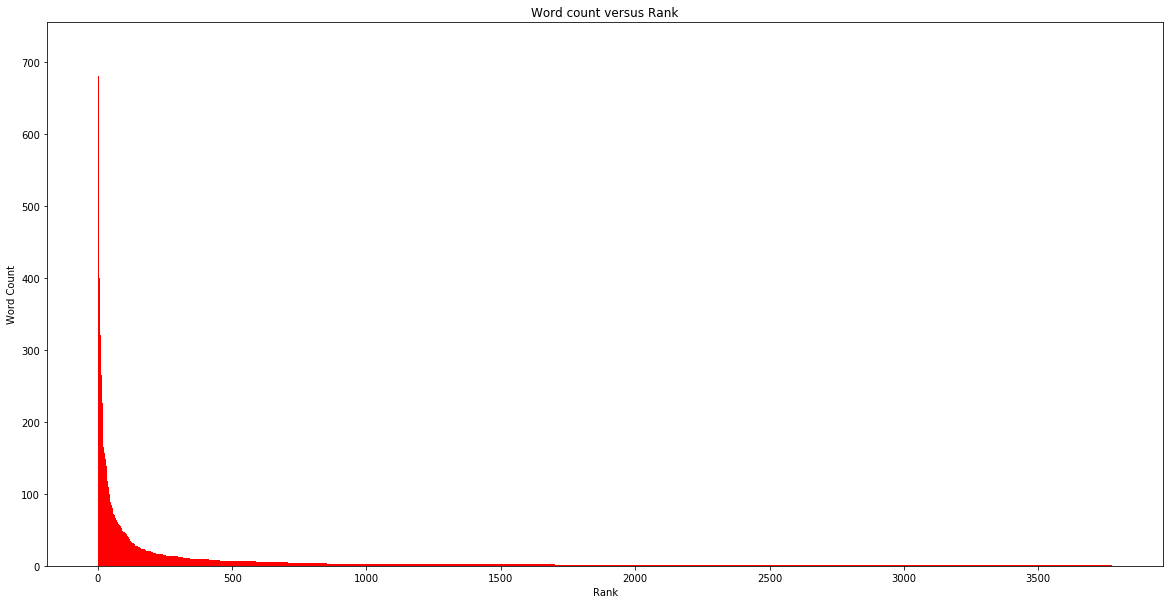

In [150]:
width = 2
plt.bar(rank_dictionary.values(), descending_dictionary.values(), width, color="red")
plt.title('Word count versus Rank')
plt.ylabel('Word Count')
plt.xlabel('Rank')

fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

## Creating new dictionaries with altered values and plotting log(word count) versus log(rank)

In [152]:
log_rank_dictionary = {}
for k, v in rank_dictionary.items():
    log_rank_dictionary[k] = np.log(v)

log_descending_dictionary = {}
for k, v in descending_dictionary.items():
    log_descending_dictionary[k] = np.log(v)

print(len(list(log_descending_dictionary.values())))
print(len(list(log_rank_dictionary.values())))

log_rank_dictionary
log_descending_dictionary

3775
3775


{'and': 6.577861357721047,
 'the': 6.522092798170152,
 'i': 6.364750756851911,
 'to': 6.352629396319567,
 'a': 6.137727054086234,
 'of': 5.991464547107982,
 'my': 5.886104031450156,
 'that': 5.846438775057725,
 'is': 5.840641657373398,
 'in': 5.768320995793772,
 'you': 5.673323267171493,
 'thou': 5.6240175061873385,
 'me': 5.579729825986222,
 'not': 5.560681631015528,
 'with': 5.541263545158426,
 'it': 5.429345628954441,
 'this': 5.420534999272286,
 'for': 5.41610040220442,
 'be': 5.3706380281276624,
 'but': 5.209486152841421,
 'what': 5.10594547390058,
 'thy': 5.099866427824199,
 'rom': 5.093750200806762,
 'her': 5.049856007249537,
 'as': 5.043425116919247,
 'o': 5.0369526024136295,
 'nurse': 5.0106352940962555,
 'will': 5.003946305945459,
 'so': 4.990432586778736,
 'love': 4.941642422609304,
 'his': 4.9344739331306915,
 'thee': 4.927253685157205,
 'romeo': 4.919980925828125,
 'have': 4.836281906951478,
 'by': 4.770684624465665,
 'he': 4.770684624465665,
 'jul': 4.762173934797756,
 's

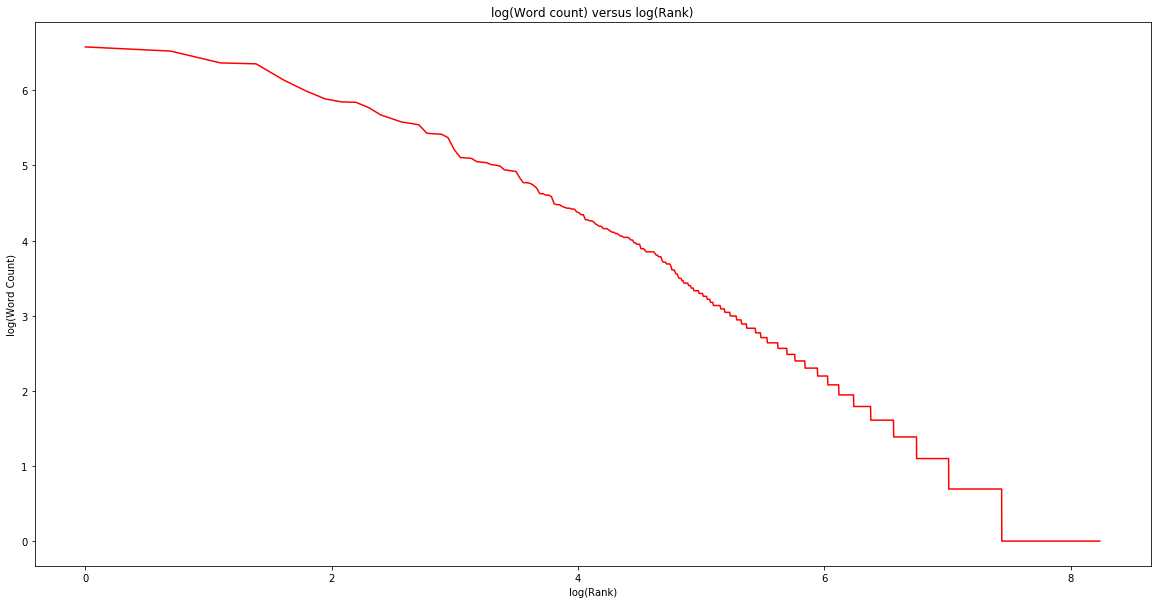

In [158]:
width = 2
plt.plot(list(log_rank_dictionary.values()), list(log_descending_dictionary.values()), width, color="red")
plt.title('log(Word count) versus log(Rank)')
plt.ylabel('log(Word Count)')
plt.xlabel('log(Rank)')

fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

#### The graph of log(word count) against log(rank) indicates an almost-linear relationship between the two. This means that as word count decreases, it decreases exponentially. For example, if "table" is rank 10, the most likely the next ranked word (11) will show up about half the number of instances as "table".